In [7]:
# Advanced regression for house prices

In [8]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [9]:
df_train= pd.read_csv(r"E:\Data_Uhasselt\Projects\house-prices-advanced-regression-techniques\train.csv",sep=';')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
df_test= pd.read_csv(r"E:\Data_Uhasselt\Projects\house-prices-advanced-regression-techniques\test.csv",sep=',')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [11]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
df_train= df_train.drop(columns=['Id'])

In [15]:
train_numeric_cols= df_train.select_dtypes(include=[np.number]).columns
train_numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
outliers_iqr = df_train[train_numeric_cols].apply(
    lambda x: (x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25))) | 
              (x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
)
outliers_iqr.sum()

MSSubClass       103
LotFrontage       88
LotArea           69
OverallQual        2
OverallCond      125
YearBuilt          7
YearRemodAdd       0
MasVnrArea        96
BsmtFinSF1         7
BsmtFinSF2       167
BsmtUnfSF         29
TotalBsmtSF       61
1stFlrSF          20
2ndFlrSF           2
LowQualFinSF      26
GrLivArea         31
BsmtFullBath       1
BsmtHalfBath      82
FullBath           0
HalfBath           0
BedroomAbvGr      35
KitchenAbvGr      68
TotRmsAbvGrd      30
Fireplaces         5
GarageYrBlt        0
GarageCars         5
GarageArea        21
WoodDeckSF        32
OpenPorchSF       77
EnclosedPorch    208
3SsnPorch         24
ScreenPorch      116
PoolArea           7
MiscVal           52
MoSold             0
YrSold             0
SalePrice         61
dtype: int64

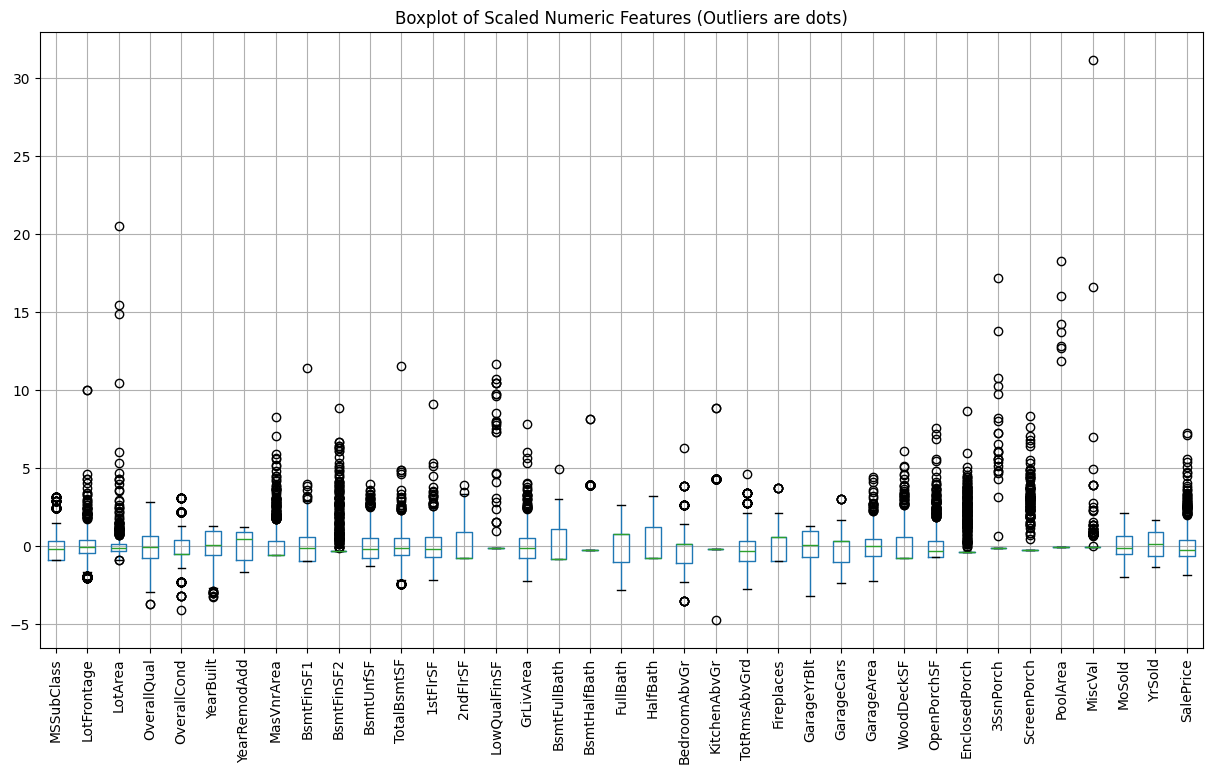

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[train_numeric_cols]), columns=train_numeric_cols)

plt.figure(figsize=(15, 8))
df_train_scaled.boxplot(rot=90)
plt.title("Boxplot of Scaled Numeric Features (Outliers are dots)")
plt.show()

In [18]:
# Keep all outliers for further analysis no need to remove them.

In [19]:
missing_cols_train = df_train.columns[df_train.isnull().any()]
missing_cols_train

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [20]:
missing_cols_test = df_test.columns[df_test.isnull().any()]
missing_cols_test

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [21]:
for col in missing_cols_train:
    if df_train[col].dtype == 'object':
        df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    else:
        df_train[col].fillna(df_train[col].mean(), inplace=True)

C:\Users\siava\AppData\Local\Temp\ipykernel_6384\2784337906.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].mean(), inplace=True)
C:\Users\siava\AppData\Local\Temp\ipykernel_6384\2784337906.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [22]:
for col in missing_cols_test:
    if df_test[col].dtype == 'object':
        df_test[col].fillna(df_test[col].mode()[0], inplace=True)
    else:
        df_test[col].fillna(df_test[col].mean(), inplace=True)

C:\Users\siava\AppData\Local\Temp\ipykernel_6384\2742408122.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[col].fillna(df_test[col].mode()[0], inplace=True)
C:\Users\siava\AppData\Local\Temp\ipykernel_6384\2742408122.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [23]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [24]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

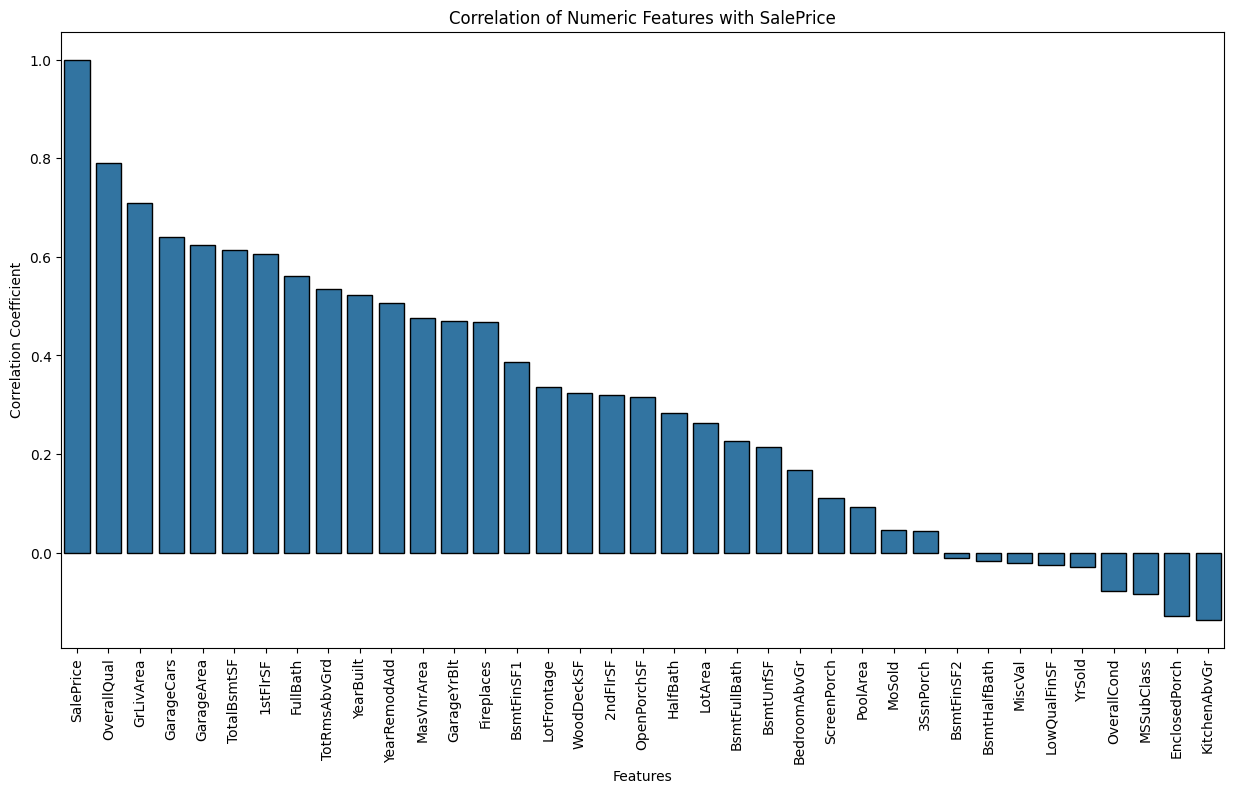

In [25]:
# we will observe the correlation between the features and the target variable 'SalePrice'
correlation= df_train[train_numeric_cols].corr()['SalePrice']
correlation = correlation.sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x=correlation.index, y=correlation.values,
 edgecolor='black')
plt.xticks(rotation=90)
plt.title("Correlation of Numeric Features with SalePrice")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

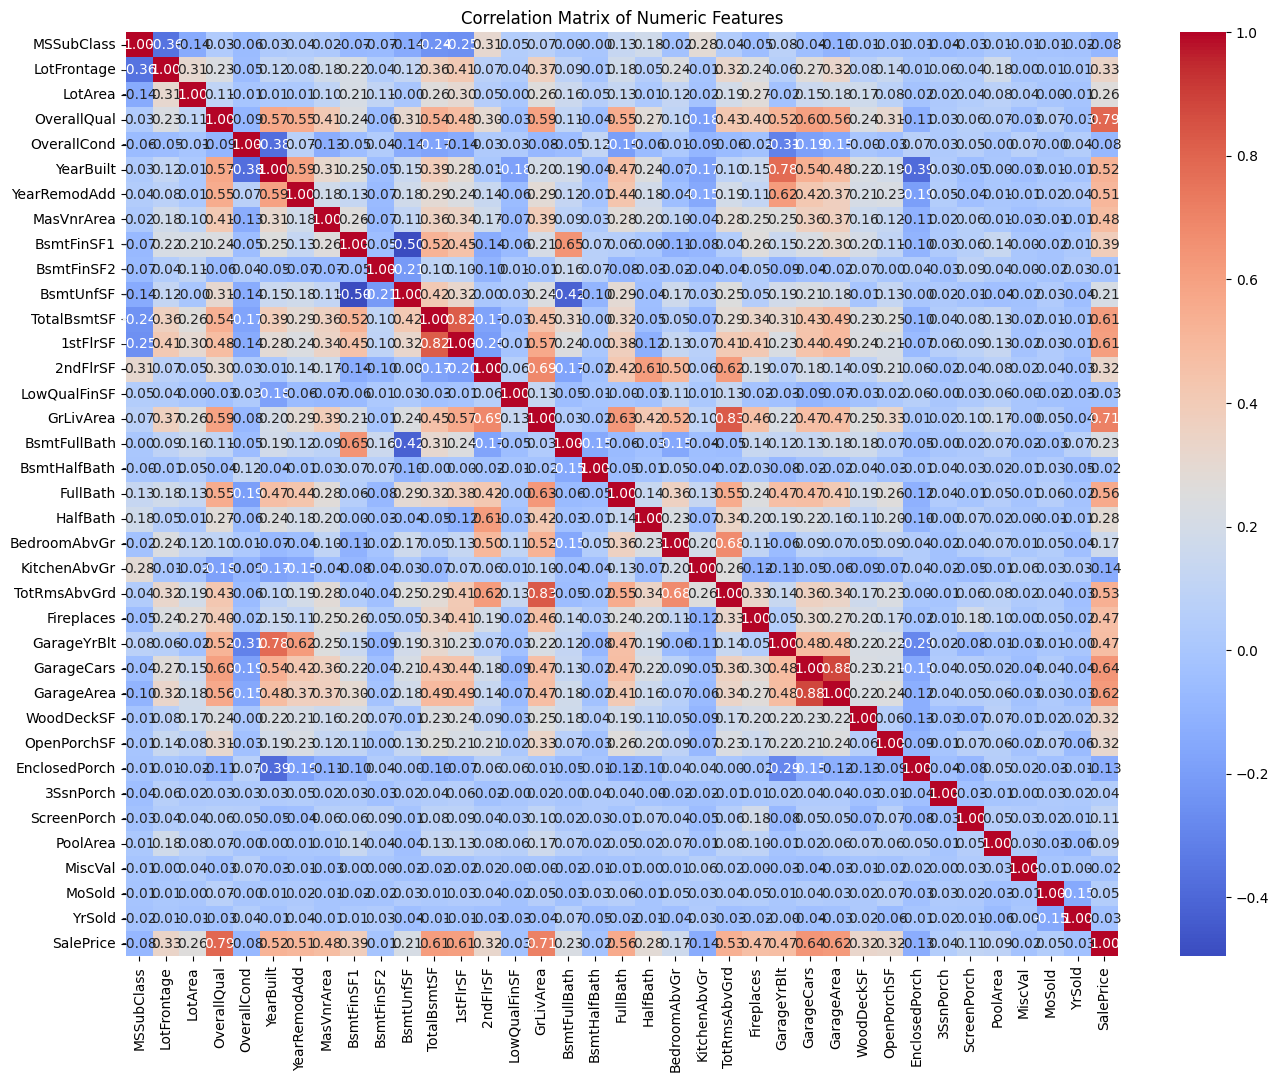

In [26]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_train[train_numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [27]:
top_features = correlation.index[1:9]

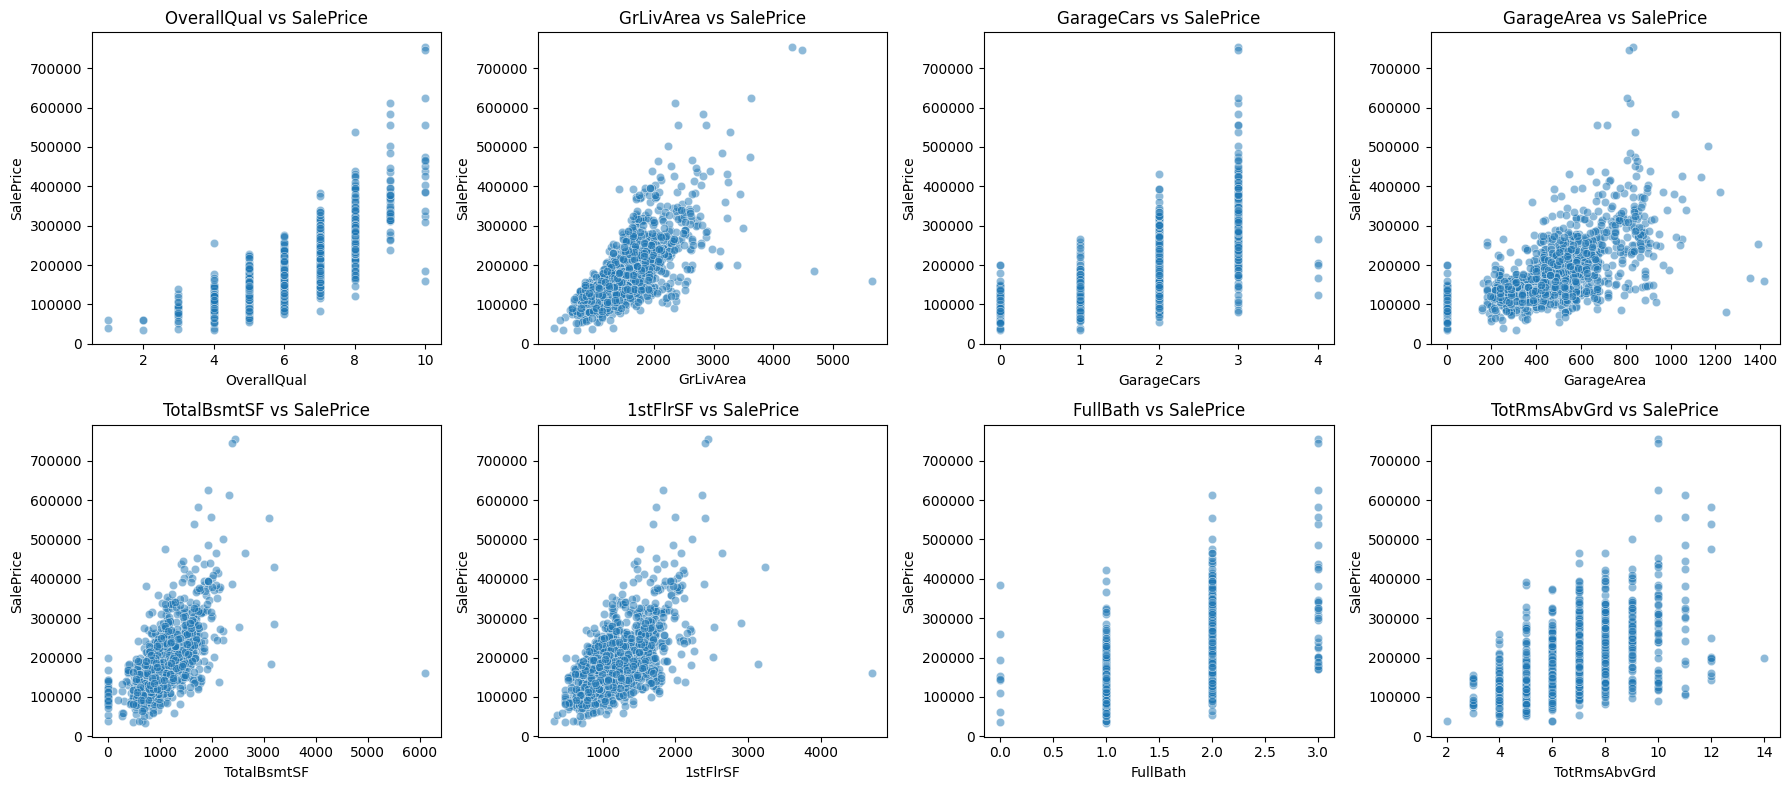

In [28]:
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(18, 8))  # 2 rows, 4 columns

for i, feature in enumerate(top_features):
    ax = axes[i // 4, i % 4]
    sns.scatterplot(x=df_train[feature], y=df_train['SalePrice'], ax=ax, alpha=0.5)
    ax.set_title(f"{feature} vs SalePrice")
    ax.set_xlabel(feature)
    ax.set_ylabel("SalePrice")

plt.tight_layout()
plt.show()

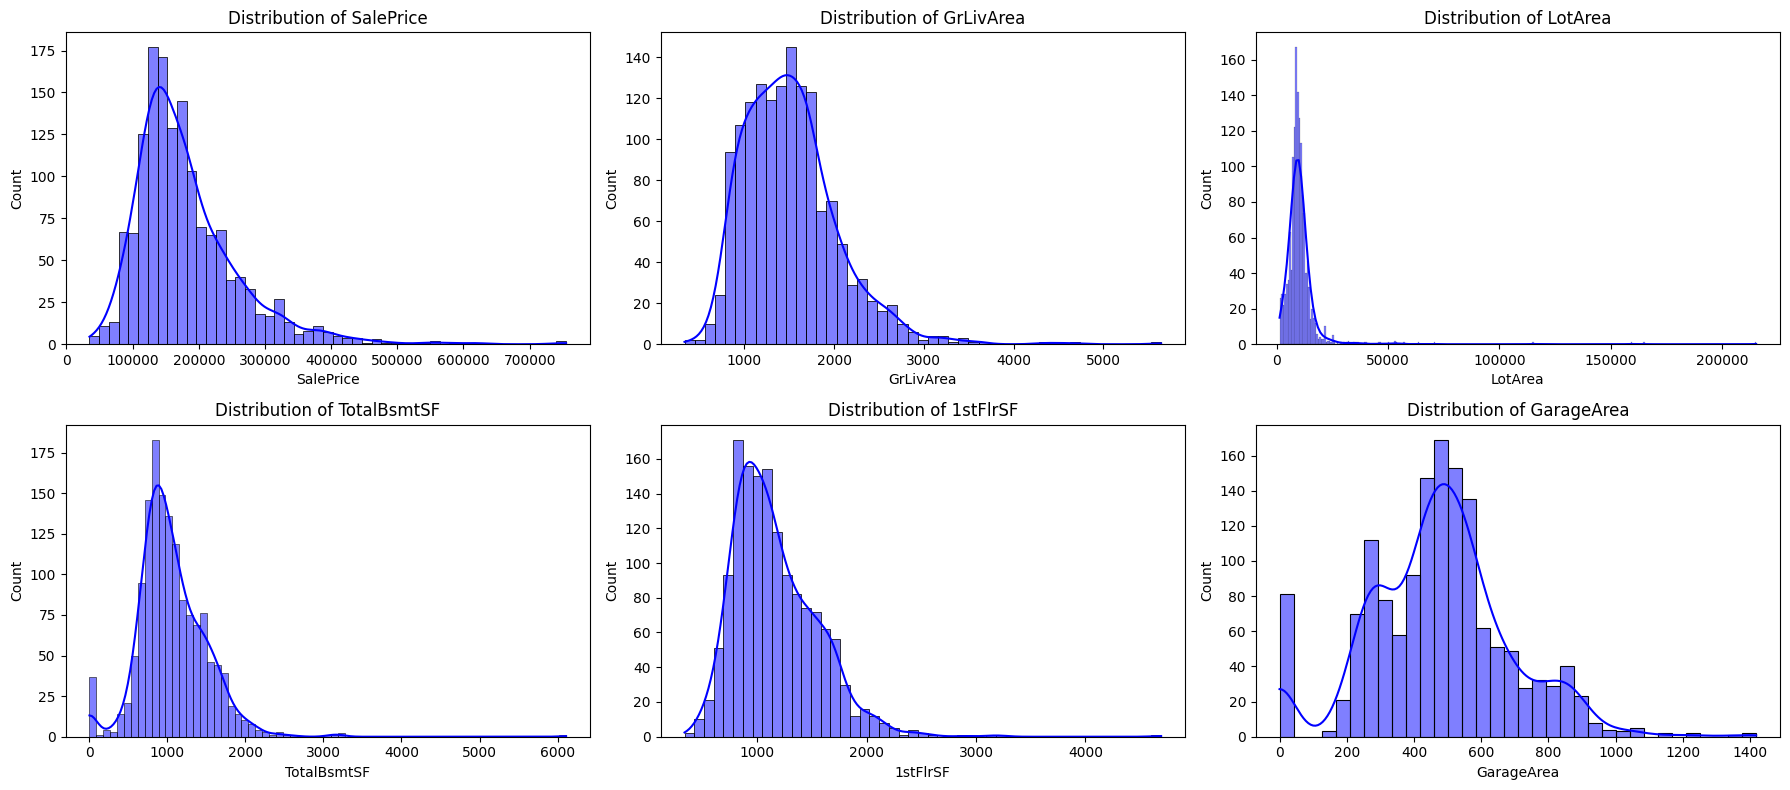

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

features = ['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

for i, feature in enumerate(features):
    ax = axes[i // 3, i % 3]
    sns.histplot(df_train[feature], kde=True, ax=ax, color='blue')
    ax.set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
x= df_train.drop(columns=['SalePrice'])
y= df_train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
categorical_cols = list(x_train.select_dtypes(include=['object']).columns)

In [36]:
# Use Catboost for regression due to the large number of categorical features

In [39]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(verbose=100, random_state=42)
catboost_model.fit(x_train, y_train, cat_features=categorical_cols)

Learning rate set to 0.04196
0:	learn: 75119.1469674	total: 192ms	remaining: 3m 11s
100:	learn: 22636.8319309	total: 5.3s	remaining: 47.2s
200:	learn: 17276.6933292	total: 10.2s	remaining: 40.7s
300:	learn: 14947.9662393	total: 15.3s	remaining: 35.4s
400:	learn: 13328.5373207	total: 20.4s	remaining: 30.5s
500:	learn: 12147.3876323	total: 25.5s	remaining: 25.4s
600:	learn: 11246.1187160	total: 30.7s	remaining: 20.4s
700:	learn: 10290.7113235	total: 35.9s	remaining: 15.3s
800:	learn: 9594.3204398	total: 41.1s	remaining: 10.2s
900:	learn: 8934.7640236	total: 46.3s	remaining: 5.09s
999:	learn: 8369.4886314	total: 51.4s	remaining: 0us


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = catboost_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 671450870.9985313
R^2 Score: 0.9124612366069413


In [42]:
# Overfitting check
y_train_pred = catboost_model.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R^2 Score: {train_r2:.3f}")

Train R^2 Score: 0.983


In [ ]:
from sklearn.model_selection import cross_validate
from catboost import CatBoostRegressor

cat_features = [x_train.columns.get_loc(col) for col in categorical_cols]

catboost_model = CatBoostRegressor(
    verbose=0,
    random_state=42,
    cat_features=cat_features  
)

cv_results = cross_validate(
    catboost_model,
    x_train,
    y_train,
    cv=5,
    scoring='r2'
)

print(f"Cross-validated R^2 scores: {cv_results['test_score']}")
print(f"Mean R^2: {cv_results['test_score'].mean():.3f}")

Cross-validated R^2 scores: [0.88337935 0.84308809 0.86246101 0.90228849 0.91194228]
Mean R^2: 0.881


In [46]:
catboost_model.fit(x_train, y_train)
y_train_pred = catboost_model.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R^2 Score: {train_r2:.3f}")

Train R^2 Score: 0.983


In [47]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cat_features = [x_train.columns.get_loc(col) for col in categorical_cols]

# Define hyperparameter grid
param_grid = {
    'depth': [3, 4, 5],
    'iterations': [100, 300],
    'l2_leaf_reg': [1, 3, 5]
}

catboost_model = CatBoostRegressor(
    verbose=0,
    random_state=42,
    cat_features=cat_features
)

# Grid search with cross-validation
grid_search = GridSearchCV(
    catboost_model,
    param_grid,
    cv=5,
    scoring='r2'
)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R^2:", grid_search.best_score_)

# Train best model on full training set and check train R^2
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train R^2 Score: {train_r2:.3f}")

Best parameters: {'depth': 5, 'iterations': 300, 'l2_leaf_reg': 1}
Best cross-validated R^2: 0.8747572883251891
Train R^2 Score: 0.952


In [65]:
test_categorical_cols= list(df_test.select_dtypes(include=['object']).columns)


In [ ]:
from catboost import Pool

# Get categorical column indices (same as used for training)
cat_features = [df_test.columns.get_loc(col) for col in test_categorical_cols]

# Create a Pool for test data to identify categorical features to prevent errors such as "Cannot convert
# "RH" to float"
 in MSZonin featuretest_pool = Pool(df_test, cat_features=cat_features)

# Predict using the Pool
price_predictions = best_model.predict(test_pool)

In [71]:
df_test['Sale_Price'] = price_predictions

In [73]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Sale_Price
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,117346.075021
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,154929.680420
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,181474.045276
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,187997.838801
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal,197677.592743
